In [3]:
import tensorflow as tf
from tensorflow import keras
import keras

import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



In [2]:
img = image.load_img(r"D:\datasets for projects\kagglecatsanddogs_3367a\PetImages\Cat\30.jpg")

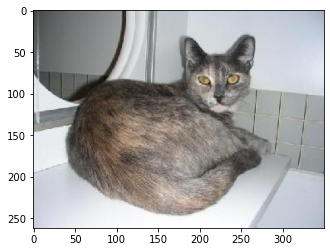

In [3]:
plt.imshow(img);

In [19]:
train = ImageDataGenerator(rescale= 1/255);
validation = ImageDataGenerator(rescale= 1/255);

In [11]:
train_dataset= train.flow_from_directory(r'D:\datasets for projects\kagglecatsanddogs_3367a\PetImages',
                                         target_size=(50,50),
                                         batch_size=5,
                                        class_mode='binary')
validation_dataset= train.flow_from_directory(r'D:\datasets for projects\kagglecatsanddogs_3367a\validation',
                                         target_size=(50,50), 
                                         batch_size=5,
                                        class_mode='binary')
test_dataset= train.flow_from_directory(r'D:\datasets for projects\kagglecatsanddogs_3367a\test',
                                         target_size=(50,50), 
                                         batch_size=5,
                                        class_mode='binary')

Found 24992 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [7]:
train_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [21]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2))

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_dataset, validation_data=validation_dataset , epochs=10)

Epoch 1/10
4286/4999 [========================>.....] - ETA: 15s - loss: 0.6459 - accuracy: 0.6140

D:\ml\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


4999/4999 [==============================] - 109s 22ms/step - loss: 0.6347 - accuracy: 0.6264 - val_loss: 0.6304 - val_accuracy: 0.6250
Epoch 2/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.5205 - accuracy: 0.7419 - val_loss: 0.4469 - val_accuracy: 0.9375
Epoch 3/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.4656 - accuracy: 0.7784 - val_loss: 0.4052 - val_accuracy: 0.8750
Epoch 4/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.4276 - accuracy: 0.8014 - val_loss: 0.5513 - val_accuracy: 0.6875
Epoch 5/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.3948 - accuracy: 0.8205 - val_loss: 0.2546 - val_accuracy: 0.9375
Epoch 6/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.3611 - accuracy: 0.8392 - val_loss: 0.1927 - val_accuracy: 0.9375
Epoch 7/10
4999/4999 [==============================] - 102s 20ms/step - loss: 0.3217 - accuracy: 0.8579 - val_loss: 0.3026 - val

In [13]:
model.save("dogsvscats.h5") 

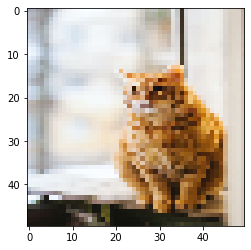

Cat


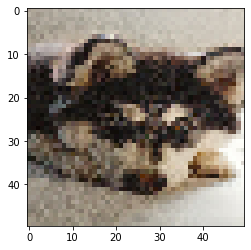

Dog


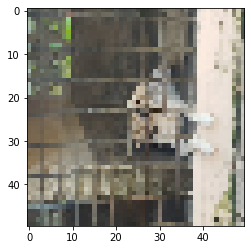

Dog


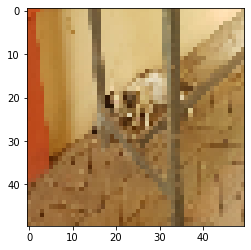

Cat


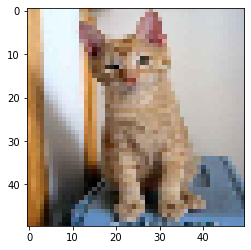

Cat


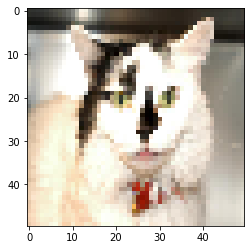

Dog


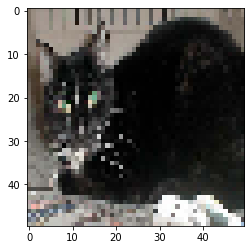

Dog


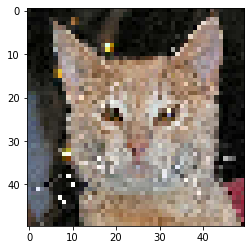

Dog


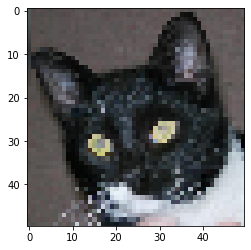

Cat


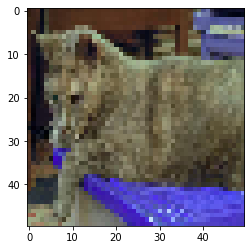

Cat


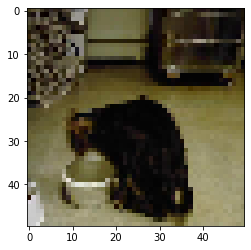

Dog


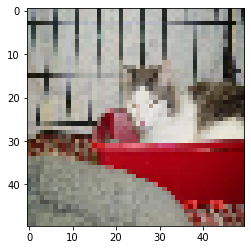

Cat


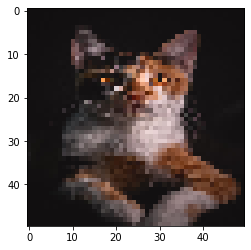

Dog


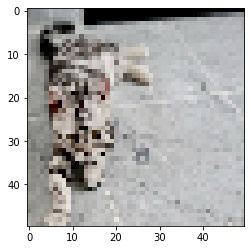

Cat


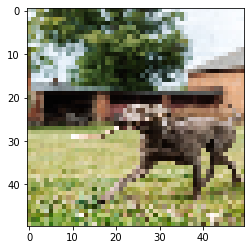

Dog


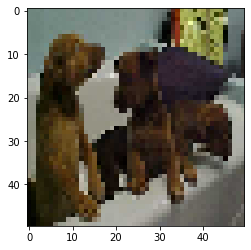

Dog


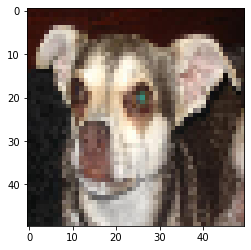

Dog


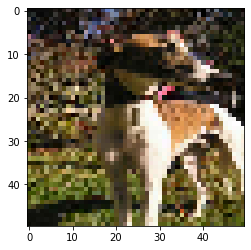

Dog


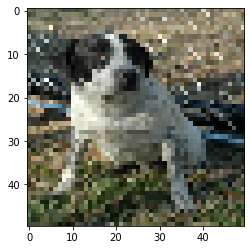

Dog


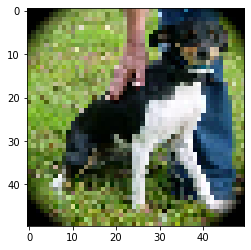

Dog


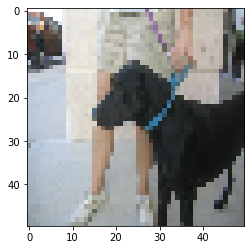

Dog


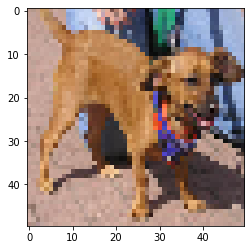

Dog


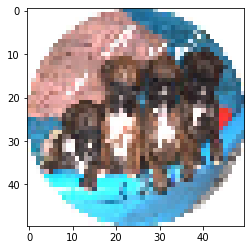

Dog


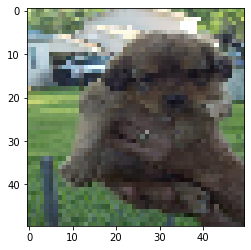

Dog


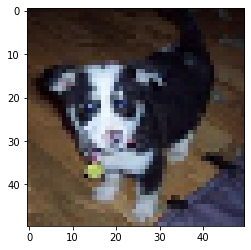

Dog


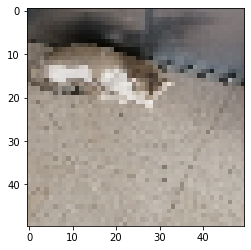

Cat


In [24]:
from keras.models import load_model

dir_path = r'D:\college\check'

for i in os.listdir(dir_path) :
    img = image.load_img(dir_path +'\\'+ i, target_size=(50,50) )
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict_classes(images)
    if val == 0:
        print("Cat")
    else :
        print("Dog")

In [25]:
 test_acc = model.evaluate(test_dataset)
 print(test_acc)

12/12 [==============================] - 0s 16ms/step - loss: 0.1968 - accuracy: 0.9000
[0.19676831364631653, 0.8999999761581421]


In [26]:
val_acc = model.evaluate(validation_dataset)
print(val_acc)

4/4 [==============================] - 0s 9ms/step - loss: 0.2091 - accuracy: 0.9375
[0.20909015834331512, 0.9375]
